# Física Computacional: Tarea Final.

## Arvizu Velázquez Arturo Alejandro.

### Primera Parte: Interpolación.

Ejercicio 1: Sea $f(x)=2sin(\frac{\pi x}{6})$:

- Use el Polinomio de Lagrange $P_2$ con nodos $x_0=0$,$x_1=1$ y $x_2=3$ para aproximar $f(2)$ y $f(2.4)$
- Use el Polinomio de Lagrange $P_2$ con nodos $x_0=0$,$x_1=1$ y $x_2=3$ para aproximar $f(3.5)$ y $f(4)$

In [12]:
from scipy import constants as cte
def f(x):
    return 2*np.sin(cte.pi*x/6)
X1=array([0,1,3])
Y1=f(X1)
puntos1=list(zip(X1,Y1))
v_a=array([2,2.4,3.5,4])
v_r=f(v_a)
v_i=list(cua_interp(v_a,puntos1[0],puntos1[1],puntos1[2]))

lista_incremental=[]
for i in range(len(v_i)):
  error=abs((v_r[i]-v_i[i])/v_r[i])*100
  lista_incremental.append([v_a[i],v_r[i],v_i[i],error])
cols = ["$X_i$","$f(X_i)$","Interpolación","error %"]
pd.DataFrame(lista_incremental, columns=cols)

,$X_i$,$f(X_i)$,Interpolación,error %
0,2.00000000000000,1.73205080756888,1.66666666666667,3.77495513506238
1,2.40000000000000,1.90211303259031,1.84000000000000,3.26547537007942
2,3.50000000000000,1.93185165257814,2.04166666666667,5.68444341686263
3,4.00000000000000,1.73205080756888,2.00000000000000,15.47005383792514


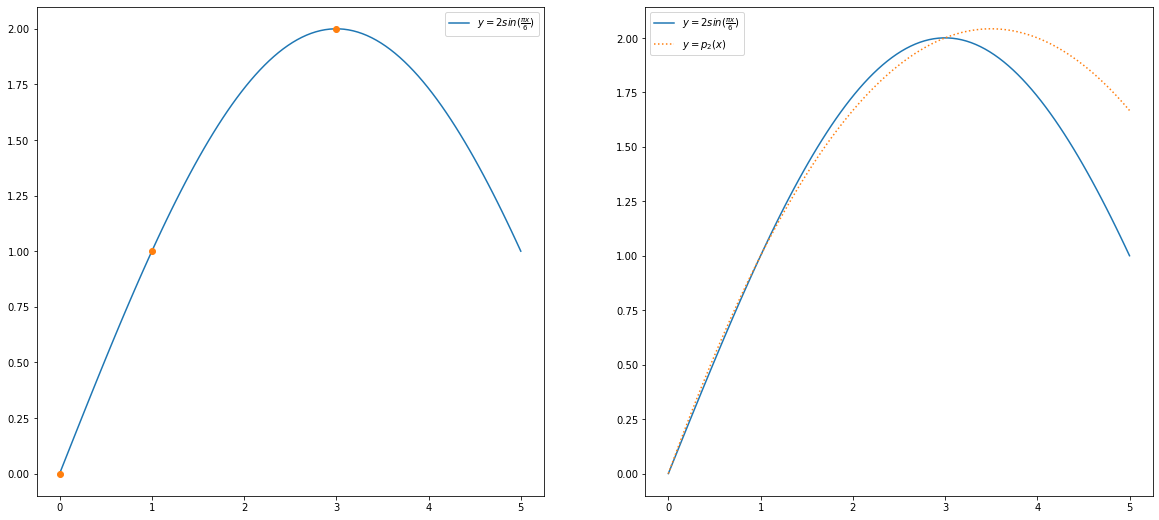

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0,5,100)
ax1.plot(xr, f(xr), label=r"$y = 2sin(\frac{\pi x}{6})$")
ax1.plot(X1, Y1, "o")
ax1.legend()

xr = np.linspace(0,5,100)
ax2.plot(xr, f(xr), label=r"$y = 2sin(\frac{\pi x}{6})$")
ax2.plot(xr, cua_interp(xr, puntos1[1], puntos1[2], puntos1[0]), ":", label=r"$y = p_2(x)$")
ax2.legend()

- Use el Polinomio de Lagrange $P_3$ con nodos $x_0=0$,$x_1=1$,$x_2=3$,$x_3=5$ para aproximar $f(2)$ y $f(2.4)$
- Use el Polinomio de Lagrange $P_3$ con nodos $x_0=0$,$x_1=1$,$x_2=3$,$x_3=5$ para aproximar $f(3.5)$ y $f(4)$

In [10]:
from scipy import constants as cte
def f(x):
    return 2*np.sin(cte.pi*x/6)
X2=array([0,1,3,5])
Y2=f(X2)
puntos2=list(zip(X2,Y2))
v_a=array([2,2.4,3.5,4])
v_r=f(v_a)
v_i=list(tercer_interp(v_a,puntos2[0],puntos2[1],puntos2[2],puntos2[3]))

lista_incremental=[]
for i in range(len(v_i)):
  error=abs((v_r[i]-v_i[i])/v_r[i])*100
  lista_incremental.append([v_a[i],v_r[i],v_i[i],error])
cols = ["$X_i$","$f(X_i)$","Interpolación","error %"]
pd.DataFrame(lista_incremental, columns=cols)


,$X_i$,$f(X_i)$,Interpolación,error %
0,2.00000000000000,1.73205080756888,1.70000000000000,1.85045423776362
1,2.40000000000000,1.90211303259031,1.87360000000000,1.49901883335912
2,3.50000000000000,1.93185165257814,1.96875000000000,1.90999900911755
3,4.00000000000000,1.73205080756888,1.80000000000000,3.92304845413262


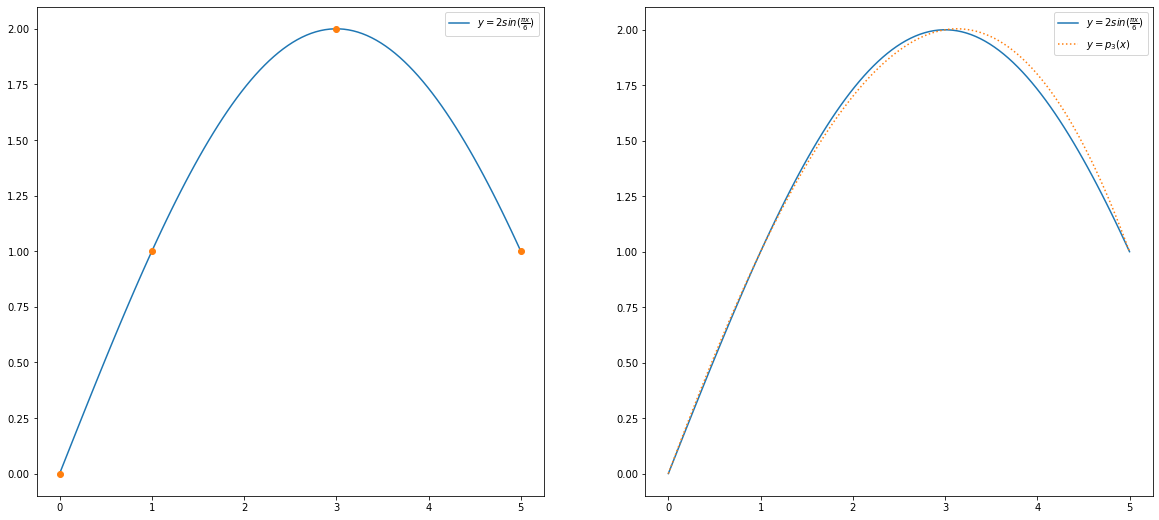

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0,5,100)
ax1.plot(xr, f(xr), label=r"$y = 2sin(\frac{\pi x}{6})$")
ax1.plot(X2, Y2, "o")
ax1.legend()

xr = np.linspace(0,5,100)
ax2.plot(xr, f(xr), label=r"$y = 2sin(\frac{\pi x}{6})$")
ax2.plot(xr, tercer_interp(xr, puntos2[0], puntos2[1], puntos2[2],puntos2[3]), ":", label=r"$y = p_3(x)$")
ax2.legend()

Ejercicio 2: De la siguiente tabla:

- a) Calcula la tabla de diferencias divididas.

In [18]:
##Tabla de diferencias divididas
X3=[1,2,3,4,5]
f_i = [3.6/X3[i] for i in range(5)]
f_ii = [(f_i[i+1] - f_i[i]) / (X3[i+1] - X3[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X3[i+2] - X3[i]) for i in range(3)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X3[i+3] - X3[i]) for i in range(2)]
f_iiiii = [(f_iiii[i+1] - f_iiii[i]) / (X3[i+4] - X3[i]) for i in range(1)]

ffdat = pd.DataFrame(list(zip_longest(f_i, f_ii, f_iii, f_iiii, f_iiiii)), 
          index=range(5), columns=["$f(x_i)$", "$Df(x_i)$", "$D^2 f(x_i)$", "$D^3 f(x_i)$", "$D^4 f(x_i)$"])
#print(ffdat)
ffdat.insert(0, "$x_i$", X3) #list.insert(index, element)
ffdat
#ffdat.style.format(dict(zip(ffdat.columns, ["{:3.1f}"] + 5*[partial(nan_sp, fmt="{:7.5f}")])))

,$x_i$,$f(x_i)$,$Df(x_i)$,$D^2 f(x_i)$,$D^3 f(x_i)$,$D^4 f(x_i)$
0,1,3.60000000000000,-1.80000000000000,0.60000000000000,-0.15000000000000,0.03000000000000
1,2,1.80000000000000,-0.60000000000000,0.15000000000000,-0.03000000000000,nan
2,3,1.20000000000000,-0.30000000000000,0.06000000000000,nan,nan
3,4,0.90000000000000,-0.18000000000000,nan,nan,nan
4,5,0.72000000000000,nan,nan,nan,nan


Los polinomios de interpolacion quedan de la siguiente manera:
$$
\begin{equation}
    P_1(x)=3.6-1.8(x-1)
\end{equation}
$$


$$
\begin{equation}
    P_2(x)=P_1(x)+0.6(x-1)(x-2)
\end{equation}
$$


$$
\begin{equation}
    P_3(x)=P_2(x)-0.15(x-1)(x-2)(x-3)
\end{equation}
$$


$$
\begin{equation}
    P_4(x)=P_3(x)+0.03(x-1)(x-2)(x-3)(x-4)
\end{equation}
$$

Procedemos a graficarlos.

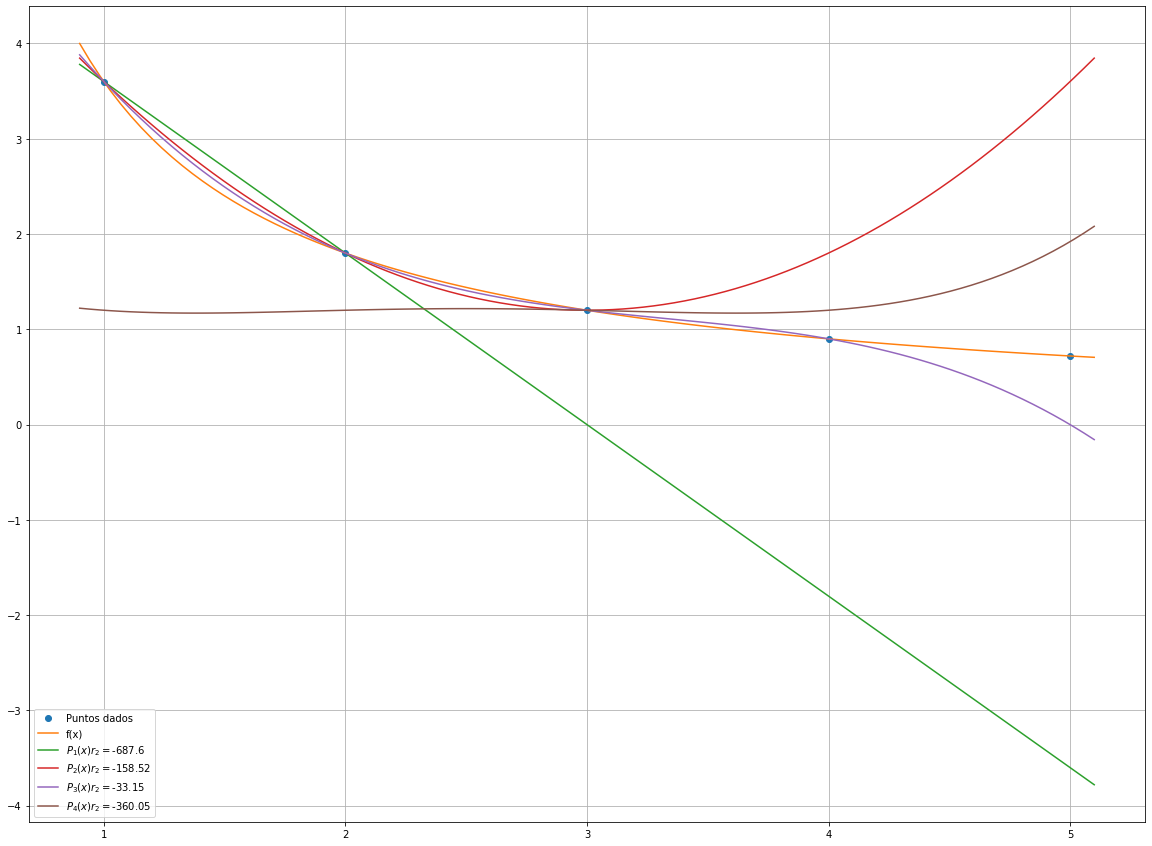

In [45]:
x1=[1,2,3,4,5]
f1=[3.6,1.8,1.2,0.9,0.72]
def f(x):
    return 3.6/x
def p1(x):
    return 3.6-1.8*(x-1)
def p2(x):
    return p1(x)+0.6*(x-1)*(x-2)
def p3(x):
    return p2(x)-0.15*(x-1)*(x-2)*(x-3)
def p4(x):
    return p3(3)+0.03*(x-1)*(x-2)*(x-3)*(x-4)
def r2(real,aprox):
    r=mean(aprox)
    s=0
    for i in range(0,len(real)):
        a=(real[i]-aprox[i])**2
        b=(real[i]-r)**2
        s+=a/b
    return round(1-s,2)

xx=linspace(0.9,5.1,100)
plt.figure(figsize=(20,15)); plt.grid()
plt.plot(x1,f1,'o',label='Puntos dados')
plt.plot(xx,f(xx),label='f(x)')
plt.plot(xx,p1(xx),label='$P_1(x)$'+'$r_2=$'+str(r2(f(xx),p1(xx))))
plt.plot(xx,p2(xx),label='$P_2(x)$'+'$r_2=$'+str(r2(f(xx),p2(xx))))
plt.plot(xx,p3(xx),label='$P_3(x)$'+'$r_2=$'+str(r2(f(xx),p3(xx))))
plt.plot(xx,p4(xx),label='$P_4(x)$'+'$r_2=$'+str(r2(f(xx),p4(xx))))
plt.legend()

3. Con la interpolación baricentrica, resuelve

    **a)** Considera la función $\ln(x + 2)$ en el intervalo $[−1, 1]$, determina el $P_3$ de tercer orden y la cota del error $|\ln(x+ 2)−P_3|$

    **b)** Considera la función $\sin(x)$ en el intervalo $[−1, 1]$, determina el $P_3$ de tercer orden y la cota del error $|\sin(x) − P_3|$

Del artículo original de Lagrange, obtenemos una fórmula para la interpolación baricéntirca descrita como:
$$
\begin{equation}
    p(x)=\frac{\displaystyle\sum_{j=0}^{n}\frac{w_j}{x-x_j}f_j}{\displaystyle\sum_{j=0}^n\frac{w_j}{x-x_j}}
\end{equation}
$$
Y para ambas funciones, como se consideran para el intervalo $[-1,1]$, consideramos utilizar la familia de los puntos de Chebyshev de primer orden, los cuales están dados como:
$$
\begin{equation}
    x_j=cos(\frac{(2j+1)\pi}{2n+2}); j=0,....,n
\end{equation}
$$
Y los pesos de CHebyshev de primer orden están dados como:
$$
\begin{equation}
    w_j=(-1)^jsin(\frac{(2j+1)\pi}{2n+2})
\end{equation}
$$
Y tomamos la cota del error como:
$$
\begin{equation}
     \displaystyle\max_{x \in [-1,1] }{ \left | f(x)-p_n(x) \right |  }
\end{equation}
$$

In [38]:
# Primero, definimos los puntos y los pesos de CHebyshev de primer orden.
def Chebyshev(n):
    x_j=[]
    w_j=[]
    for i in range(n+1):
        x_j.append(np.cos((2*i+1)*np.pi/(2*(n)+2)))
        w_j.append((-1)**i*np.sin((2*i+1)*np.pi/(2*n+2)))
    x_j=np.array(x_j)
    w_j=np.array(w_j)
    return x_j,w_j

# Ahora redefinimos p(x) como en el artículo original de Lagrange
def bar_interp(x, X, W, Y):
    n = len(X)
    l1 = 0
    l2 = 0
    for k in range(n):
        l1 += (W[k]/(x-X[k]))*Y[k]
        l2 += (W[k]/(x-X[k]))
    return l1/l2

El error es :0.002343202802983946


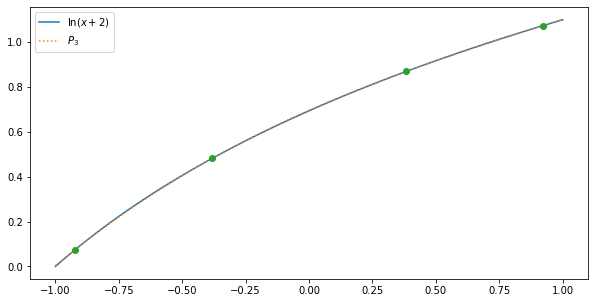

In [48]:
def f1(x):
    return np.log(x+2)
X, W = Chev(3);
Y = f1(X);
x = np.linspace(-1,1)

plt.figure(figsize=(10,5))
plt.plot(x, f1(x), label=r"$\ln(x+2)$")
plt.plot(x, bar_interp(x, X, W, Y), ":", label=r"$P_3$")
plt.plot(X, Y, "o")
plt.legend()

for n in range(-1,1):
    err=max(abs(f1(n)-bar_interp(n, X, W, Y)),n)
print("El error es :"+str(err))

El error es :0.0


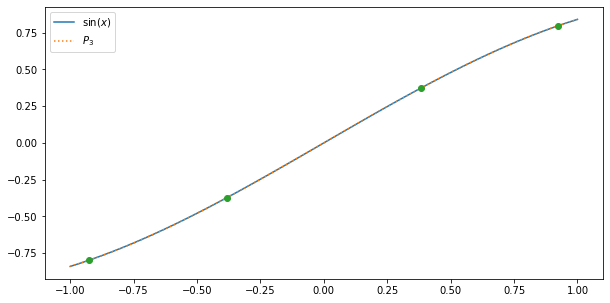

In [51]:
def f2(x):
    return np.sin(x)
X, W = Chev(3);
Y = f2(X);
x = np.linspace(-1,1)

plt.figure(figsize=(10,5))
plt.plot(x, f2(x), label=r"$\sin(x)$")
plt.plot(x, bar_interp(x, X, W, Y), ":", label=r"$P_3$")
plt.plot(X, Y, "o")
plt.legend()

for n in range(-1,1):
    err=max(abs(f2(n)-bar_interp(n, X, W, Y)),n)
print("El error es :"+str(err))

### Segunda Parte: Integración.

#### **Integración Numérica.**

Una corriente alterna está descrita por:
$$
\begin{equation}
    i(t)=i_0(sin{\frac{\pi t}{t_0}}-\beta sin{\frac{2\pi t}{t_0}})
\end{equation}
$$
Donde $i_0=1A$,$t_0=0.05s$,$\beta=0.2$. Obtén numéricamente la corriente cuadrática media, definida como:
$$
\begin{equation}
    i_{rms}=\sqrt{\frac{1}{t_0}\int_0^{t_0}i^2(t)dt}
\end{equation}
$$

Resuelve por el método que prefieras. Defiende el método que usas. Determina el error de tu resultado para distintas N.

Tenemos que la integral a calcular es:
$$
\begin{equation}
    i_{rms}=\sqrt{\frac{1}{t_0}\int_0^{t_0}i_0^2(sin{\frac{\pi t}{t_0}}-\beta sin{\frac{2\pi t}{t_0}})^2dt}
\end{equation}
$$
Y sustituyendo el valor de las constantes, tenemos que:
$$
\begin{equation}
    i_{rms}=\sqrt{\frac{1}{0.05}\int_0^{0.05}(sin{\frac{\pi t}{0.05}}-0.2 sin{\frac{2\pi t}{0.05}})^2dt}
\end{equation}
$$
Y procedemos a calcular el valor de la integral usando metodo de Simpson.

In [3]:
def i(t):
    return (np.sin((np.pi*t)/0.05)-0.2*(np.sin((2*np.pi*t)/0.05)))**2
#Calculamos la integral por varios métodos a una n=10 fija y luego compararemos.
res=[float(trapezoidal(i,0,0.05,10)),float(simpson(i,0,0.05,10)),float(gaussxwab(i,10,0.0,0.05))]
i_rms=[((1/0.05)*res[0])**(0.5),((1/0.05)*res[1])**(0.5),((1/0.05)*res[2])**(0.5)]

iter=[1,10,100]
g=[]
for k in iter:
    l1=((1/0.05)*trapezoidal(i,0.0,0.05,k))**(0.5)
    l2=((1/0.05)*simpson(i,0.0,0.05,k))**(0.5)
    l3=((1/0.05)*gaussxwab(i,k,0.0,0.05))**(0.5)
g.append([l1,l2,l3])
nm=['Trapecio','Simpson','Gauss']
cl=['n=1','n=10','n=100']
pd.DataFrame(g,index=cl,columns=nm)

,Trapecio,Simpson,Gauss
n=1,0.72111025509280,0.72111025509280,0.72111025509280
n=10,0.72111025509280,0.72111025509280,0.72111025509280
n=100,0.72111025509280,0.72111025509280,0.72111025509280


Entonces, vemos que para las iteraciones n=1,10,100, los tres métodos presentan resultados practicamente iguales, quedando que la corriente cuadrática media es igual a:
$$
\begin{equation}
    i_{rms}=0.72111
\end{equation}
$$

#### **El límite de difracción de un telescopio.**

Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de luz en nuestros telescopios. La luz de las estrellas puede tratarse efectivamente como si viniera de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda $\lambda$, pasa a través de la circular apertura de un telescopio (que asumiremos que tiene un radio unitario) y está enfocado por el telescopio en el plano focal, produce no solo un punto, sino un patrón de difracción circular que consiste en una mancha central rodeada por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción viene dada por:
$$
\begin{equation}
    I(r)=(\frac{J_1(kr)}{kr})^2
\end{equation}
$$
donde r es la distancia en el plano focal desde el centro del patrón de difracción, $k = 2\frac{\pi}{\lambda}$ y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m$ están dadas por:
$$
\begin{equation}
    J_m(x)=\frac{1}{\pi}\int_0^\pi cos(m\theta - xsin(\theta))d\theta
\end{equation}
$$
donde m son enteros no negativos y $x>=0$.

- Hacer una función de Python $J(m, x)$ que calcula el valor de $J_m(x)$ usando Simpson con $N=1000$ puntos. Usamos la función en un programa para hacer una gráfica de las funciones de Bessel $J_0$, $J_1$ y $J_2$ en función de x de $x = 0$ a $x = 20$.

- Hacer un segundo programa que haga un diagrama de densidad de la intensidad del patrón circular de difracción de una fuente de luz puntual con $\lambda = 500 nm$, en una región cuadrada de el plano focal, usando la fórmula dada arriba. Tu imagen debe cubrir valores de r desde cero hasta aproximadamente $1 \mu m$.

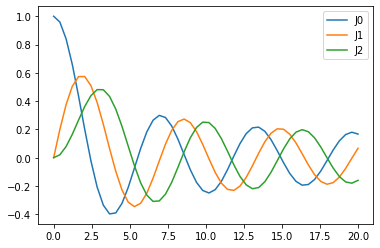

In [4]:
#Funciones de Bessel:
from pylab import *
def J(m,x):
    f=lambda theta: cos(m*theta - x*sin(theta))
    N = 1000
    a = 0.
    b = pi
    h = (b-a)/N
    s = f(a) + f(b) + 4*f(b-h)
    for k in range(1,N//2):
        s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    I = h/3*s/pi
    return I
x = linspace(0,20)

plot(x,J(0,x),label='J0')
plot(x,J(1,x),label='J1')
plot(x,J(2,x),label='J2')
legend()

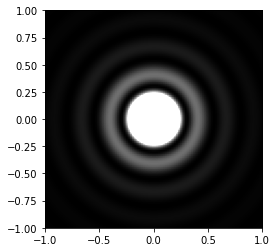

In [16]:
from pylab import *
x,y = mgrid[-1:1:100j,-1:1:100j]
r = sqrt(x**2 + y**2)
long_onda = 0.5
k = 2*pi/long_onda
I = (J(1,r*k)/k/r)**2
gray()
imshow(I,vmax=0.1/10,extent=(-1,1,-1,1))

#### **Constante de Stefan-Boltzmann.**

La teoría de Planck de radiación térmica nos dice que en el intervalo de frecuencia angular $\omega$ a $\omega + d\omega$, un cuerpo negro de área unitaria irradia electromagnéticamente una cantidad de energía térmica por segundo igual a $I(\omega)d\omega$, donde:
$$
\begin{equation}
    I(\omega)=\frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{e^{\frac{\hbar \omega}{k_BT}}-1}
\end{equation}
$$

La tasa total a la que un cuerpo negro irradia energía por unidad de área sobre todas las frecuencias, es:
$$
\begin{equation}
    W=\frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty\frac{x^3}{e^x-1}dx
\end{equation}
$$
Integra numéricamente y encuentra W con todos los métodos de integración que conocemos.

De la integral:
$$
\begin{equation}
    W=\frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty\frac{x^3}{e^x-1}dx
\end{equation}
$$
Podemos hacernos la vida más facil y redicir esta integral evaluada de $0$ a $\infty$ a una integral evaluada de 0 a 1, realizando el siguiente cambio de variable:
$$
\begin{equation}
    \begin{matrix}x=\frac{u}{1-u} & \to dx=\frac{1}{(1-u)^2}du \\ x\to 0 & u\to 0 \\ x\to \infty & u\to 1   \end{matrix}
\end{equation}
$$
Donde
$$
\begin{equation}
    \begin{matrix} x^3=\frac{u^3}{(1-u)^3} & e^x=e^{\frac{u}{1-u}}  \end{matrix}
\end{equation}
$$
Y reducimos la integral a la siguiente expresión:
$$
\begin{equation}
    \int_0^\infty\frac{x^3}{e^x-1}=\int_0^1\frac{u^3}{(1-u)^3}\frac{1}{e^{\frac{u}{1-u}}-1}\frac{1}{(1-u)^2}du
\end{equation}
$$


$$
\begin{equation}
    \int_0^\infty\frac{x^3}{e^x-1}=\int_0^1\frac{u^3}{(1-u)^5}\frac{du}{e^{\frac{u}{1-u}}-1}
\end{equation}
$$

La cual es la integral que resolveremos numéricamente.

In [6]:
from scipy import constants as cte

def cuerpo_negro(u):
    return (1-u)**(-5)*u**3/(-1+np.e**(u/(1-u)))
integral=[trapezoidal(cuerpo_negro,0.001,0.99,100),simpson(cuerpo_negro,0.01,0.99,100),gaussxwab(cuerpo_negro,100,0.01,0.99)]
#Importante notar que definimos los limites de integración como [0.01,0.99] para que nos se divida entre cero y fallen los metodos
cte1=cte.k**4/(4*cte.pi**2*cte.c**2*cte.hbar**3)
stfbtlz=[cte1*integral[0],cte1*integral[1],cte1*integral[2]]

lista_incremental=[]
valor_real= cte.sigma
for i in range(len(stfbtlz)):
  error=abs((valor_real-stfbtlz[i])/valor_real)*100
  lista_incremental.append([valor_real,stfbtlz[i],error])
nm=['Trapecio','Simpson','Gauss']
cols = ["Valor Real","Valor Obtenido","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Valor Real,Valor Obtenido,error %
Trapecio,0.00000005670374,0.00000005670374,0.00000024939467
Simpson,0.00000005670374,0.00000005670374,0.00001591499690
Gauss,0.00000005670374,0.00000005670374,0.00000526684890


Observamos que el método de Simpson es el que tiene un error mínimo, por lo que tomamos como resultado final:
$$
\begin{equation}
    W=5.670373516560087x10^{-08}
\end{equation}
$$

#### **Producción de fotones en colisiones de iones pesados.**

En una colisión de iones pesados ($C_u$, $P_b$, $A_u$, $U$, etc.) se generan fotones como producto de las interacciones fuerte y electromagnética que tienen lugar. La cantidad de fotones producidos es proporcional a: ($\textbf{Que flojera escribir esa cosa del demonio en latex, asi que pasemos al problema.}$)

- a) Calcula $f(\omega_q)$ de manera numérica para un campo magnético de intensidad $|eB| = 0.02 GeV^2$, una constante $\Lambda = 2 GeV$ y para una $\omega_q = 3 GeV$.
- b) Grafica la función f para valores de $\omega_q \in [0.3, 3] GeV$.

El valor de la integral es: 1.7630640639592863e-06


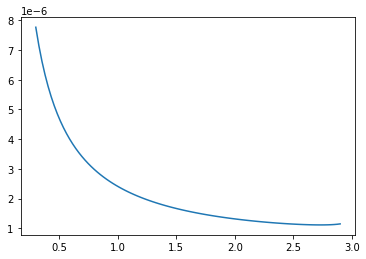

In [24]:
#Importamos las funciones de Bessel modificadas de primera clase de Scipy.
from scipy.special import i0,i1
from scipy import constants as cte
#Definimos nuestras constantes.
a=1
eb=0.02
s=2
wq=3
def nw(wp):
    return 3/(np.e**(wp/s)-1)
def gf(wp):
    return (wp**2+wq**2-wp*wq)/(2*eb)
def fotones(wp):
    a=(2*wp**2+wq**2-wp*wq)
    b=np.e**(-gf(wp))
    c=nw(wp)
    d=1+2*nw(abs(wq-wp))
    e0=i0(gf(wp))
    e1=i1(gf(wp))
    ee=e0-e1
    y=a*b*c*d*ee
    return y 
#Solo incluiremos la integral por el método de cuadratura gaussiana, pues para los demás metodos, estos fallan.
integral=gaussxwab(fotones,100,0,wq)
cte2=(a*cte.pi)/(2*(2*cte.pi)**6*wq)
print("El valor de la integral es: %s"%(cte2*integral))

#Definimos nuestro espacio lineal
WQ=linspace(0.3,2.9,100)
fw=[]
for k in range(0,len(WQ)):
    w_q=WQ[k]
    cte2=(a*cte.pi)/(2*(2*cte.pi)**6*w_q)
    integral2=gaussxwab(fotones,100,0,w_q)
    fw.append(cte2*integral2)
plot(WQ,fw)

#### **Péndulo doble**

En clase resolvimos el péndulo no lineal, también hemos hecho el péndulo amortiguado,anarmónico y cuántico. Ahora es el turno de resolver el péndulo doble. Supondremos que no tiene fricción, que las dos masas son iguales y que $L_1 = L_2 = L$: 
- (i) Deriva las ecuaciones de movimiento a programar. Usa la formulación Lagrangiana.
- (ii) Resuelve numéricamente las ecuaciones diferenciales con el método que prefieras y luego gráfica θ 1 , θ 2 con respecto a t. Defiende el método que escogiste, discute como es la simetría temporal y error, compara con otros métodos.
Deriva las ecuaciones anteriores. Usa la formulación Lagrangiana.

Las dosvariables a considerar son $\theta_1$ y $\theta_2$, las cuales corresponden al ángulo de cada péndulo respecto a la vertical. Las componentes de posición y de velocidad para cada péndulo estan dadas por:

\begin{align*} x_1 & = l_1\sin\theta_1 & \dot{x}_1 &= l_1\dot{\theta}_1\cos\theta_1\\ y_1 & = -l_1\cos\theta_1 & \dot{y}_1 &= l_1\dot{\theta}_1\sin\theta_1\\ x_2 & = l_1\sin\theta_1 + l_2\sin\theta_2 & \dot{x}_2 &= l_1\dot{\theta}_1\cos\theta_1 + l_2\dot{\theta}_2\cos\theta_2\\ y_2 & = -l_1\cos\theta_1 - l_2\cos\theta_2 & \dot{y}_2 &= l_1\dot{\theta}_1\sin\theta_1 + l_2\dot{\theta}_2\sin\theta_2 \end{align*}
Las energías cinética y potencial están dadas por:

\begin{align*} V &= m_1gy_1 + m_2gy_2 = -(m_1 + m_2)l_1g\cos\theta_1 - m_2l_2g\cos\theta_2\\ T &= \tfrac{1}{2}m_1v_1^2 + \tfrac{1}{2}m_2v_2^2 = \tfrac{1}{2}m_1(\dot{x}_1^2 + \dot{y}_1^2) + \tfrac{1}{2}m_2(\dot{x}_2^2 + \dot{y}_2^2)\\ &= \tfrac{1}{2}m_1l_1^2\dot{\theta}_1^2 + \tfrac{1}{2}m_2[l_1^2\dot{\theta}_1^2 + l_2^2\dot{\theta}_2^2 + 2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)] \end{align*}
Y el Lagrangiano, definido por, $\mathcal{L} = T - V$ es igual a:

\begin{align*} \mathcal{L} = \tfrac{1}{2}(m_1+m_2)l_1^2\dot{\theta}_1^2 + \tfrac{1}{2}m_2l_2^2\dot{\theta}_2^2 + m_1l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2) + (m_1+m_2)l_1g\cos\theta_1 + m_2gl_2\cos\theta_2. \end{align*}
Y las ecuaciones de Euler-Lagrange para $\theta_1$ y $\theta_2$ se definen como:

\begin{align*} \frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial\mathcal{L}}{\partial \dot{q}_i}\right) - \frac{\partial \mathcal{L}}{\partial q_i} = 0 \quad \mathrm{for}\;q_i = \theta_1, \theta_2. \end{align*}
Para las coordenadas $\theta_1$ y $\theta_2$, obtenemos:

\begin{align*} (m_1 + m_2)l_1 \ddot{\theta}_1 + m_2l_2\ddot{\theta}_2\cos(\theta_1 - \theta_2) + m_2l_2\dot{\theta}_2^2\sin(\theta_1 - \theta_2) + (m_1+m_2)g\sin\theta_1 &= 0,\\ m_2l_2\ddot{\theta}_2 + m_2l_1\ddot{\theta}_1\cos(\theta_1 - \theta_2) - m_2l_1\dot{\theta}_1^2\sin(\theta_1 - \theta_2) + m_2g\sin\theta_2 = 0. \end{align*}
Podemos reducir este sistema de ecuaciones de segundo orden a uno de primer order realizando el cambio de variable: $z_1 \equiv \dot{\theta_1} \Rightarrow \ddot{\theta}_1 = \dot{z}_1$ y $z_2 \equiv \dot{\theta_2} \Rightarrow \ddot{\theta}_2 = \dot{z}_2$. Donde, después de mucha álgebra infernal, obtenemos el siguiente sistema de ecuaciones para$\dot{z}_1$ and $\dot{z}_2$:

\begin{align*} \dot{z}_1 = \frac{m_2g\sin\theta_2\cos(\theta_1-\theta_2) - m_2\sin(\theta_1 - \theta_2)[l_1z_1^2\cos(\theta_1 - \theta_2) + l_2z_2^2] - (m_1+m_2)g\sin\theta_1}{l_1[m_1 + m_2\sin^2(\theta_1-\theta_2)]},\\ \dot{z}_2 = \frac{(m_1+m_2)[l_1z_1^2\sin(\theta_1-\theta_2) - g\sin\theta_2 + g\sin\theta_1\cos(\theta_1-\theta_2)]+m_2l_2z_2^2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)}{l_2[m_1 + m_2\sin^2(\theta_1-\theta_2)]} \end{align*}

#### **Comparemos métodos**

El bloque de hierro magnetizado de masa m está unido a un resorte de rigidez k y longitud L. El bloque está en reposo en $x = L$ cuando un electroimán está encendido, ejerciendo una fuerza de repulsión $F = c/x^2$ en el bloque. La ecuación de movimiento resultante es:
$$
\begin{equation}
    m\ddot x=\frac{c}{x^2}-k(x-L)
\end{equation}
$$
Determina la amplitud y el periodo. Resuelve usando tres métodos numéricos. Compara las soluciones obtenidas por los distintos métodos. Explica, ¿Por qué usas estos métodos?

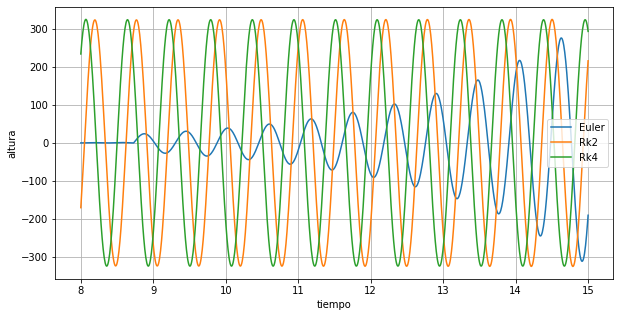

In [89]:
from pylab import *

def f(r,t):
    x=r[0]
    v=r[1]
    fx=v
    fv=(c/(x**2)-k*(x-l))*1/m
    return array([fx,fv],float)
c=5;m=1;k=120;l=0.2
a = 8.0
b = 15.0
N = 1000
h = (b-a)/N

lista_v1=[]
lista_x1=[]
lista_v2=[]
lista_x2=[]
lista_v3=[]
lista_x3=[]
lista_t = np.linspace(a,b,N)
t=0
r=([l,0.0]) #cond inicial
for t in lista_t:
    lista_x1.append(r[0])
    lista_v1.append(r[1])
    r += h * f(r,t)
    
for t in lista_t:
    lista_x2.append(r[0])
    lista_v2.append(r[1])
    k1 = f(r,t)
    k2 = f(r+ 0.5*h*k1, t+0.5*h)
    r += h * k2
    
for t in lista_t:
    lista_x3.append(r[0])
    lista_v3.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6.
figure(figsize=(10,5))
grid()
plot(lista_t,lista_x1,label="Euler")
plot(lista_t,lista_x2,label="Rk2")
plot(lista_t,lista_x3,label="Rk4")
legend()
xlabel('tiempo')
ylabel('altura')
show()


#### **Numerov**
Aplicar el algoritmo Numerov para resolver.
$$
\begin{equation}
    u^{''}(x)=-4\pi^2u(x)
\end{equation}
$$
con $u(0) = 1$ y $u'(0) = 0$. Discute la precisión del resultado comparando con la solución obtenida por el método de Runge-Kutta de orden 4 y con el resultado exacto.

## Apéndice: ¿Será esto la aduana? Porque aquí aparecen puros imports, si señor.

In [85]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
pd.options.display.float_format = '{:.14f}'.format
from collections import namedtuple 
#namedtuple() funcion que permite hacer colecciones con tublas dadas
from itertools import zip_longest
# zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D- --> #funcion dada para acomodar valores juntos
from functools import partial
#ejemplo de partial
from statistics import mean

def cua_interp(x, p0, p1,p2):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    return y0*((x-x1)*(x-x2))/((x0-x1)*(x0-x2))+y1*((x-x0)*(x-x2))/((x1-x0)*(x1-x2))+y2*((x-x0)*(x-x1))/((x2-x0)*(x2-x1))

def tercer_interp(x,p0,p1,p2,p3):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    return y0*((x-x1)*(x-x2)*(x-x3))/((x0-x1)*(x0-x2)*(x0-x3))+y1*((x-x0)*(x-x2)*(x-x3))/((x1-x0)*(x1-x2)*(x1-x3))+y2*((x-x0)*(x-x1)*(x-x3))/((x2-x0)*(x2-x1)*(x2-x3))+ y3*((x-x0)*(x-x1)*(x-x2))/((x3-x0)*(x3-x1)*(x3-x2))

def trapezoidal(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h

def simpson(f, a, b, n):
    h=float((b-a)/n)
    integral=f(a)+f(b)
    for i in range(1,n):
        k=a+i*h
        if i%2==0:
            integral=integral+2*f(k)
        else:
            integral=integral+4*f(k)
    integral=integral*h/3
    return integral

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    #Aproximación inicial de las raíces de los polinomios de Legendre
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))
    # Encontramos ceros de Legendre con Newton-Raphson
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculando los pesos
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(f,N,a,b):
    x,w=gaussxw(N)
    xp=0.5*(b-a)*x+0.5*(b+a)
    wp=0.5*(b-a)*w
    s=0.0
    for k in range(N):
        s+=wp[k]*f(xp[k])
    return s

def run_kut4(f,x,y,h):
    k0=h*f(x,y)
    k1=h*f(x+h/2.0,y+k0/2.0)
    k2=h*f(x+h/2.0,y+k1/2.0)
    k3=h*f(x+h,y+k2)
    return (k0+2.0*k1+2.0*k2+k3)/6.0

def run_kut2(f,x,y,h):
    k0=h*f(x,y)
    k1=h*f(x+h/2.0,y+k0/2.0)
    return k1

def leapfrog(F,x0,v0):
    x = zeros(N)
    v = zeros(N)
    x[0] = x0
    v[0] = v0
    fac1 = 1.0 - 0.5*dt
    fac2 = 1.0/(1.0 + 0.5*dt)
    for i in range(N-1):
        v[i + 1] = fac1*fac2*v[i] - fac2*dt*x[i] + fac2*dt*F[i]
        x[i + 1] = x[i] + dt*v[i + 1]
    return x,v
